In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
# Define the path to the csv file
file_path = r"D:\Churn Analysis using power BI\Data For churn Prediction"


In [3]:
data=pd.read_csv(r'D:\Churn Analysis using power BI\Data For churn Prediction/churndata.csv')

In [4]:
data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
#Data Preprocessing
# Drop columns that won't be used for prediction
data=data.drop(['customer_id','churn_category','churn_reason'],axis=1)


In [6]:
data


,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Male,35,No,Delhi,7,27,NaN,Yes,No,Yes,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned
6003,Male,51,Yes,Haryana,0,19,Deal 1,No,No,Yes,...,Two Year,No,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed
6004,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned
6005,Male,23,No,Odisha,2,10,NaN,Yes,Yes,Yes,...,One Year,Yes,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed


In [7]:
# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]


In [8]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [9]:
data.columns

Index(['gender', 'age', 'married', 'state', 'number_of_referrals',
       'tenure_in_months', 'value_deal', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charge',
       'total_charges', 'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue', 'customer_status'],
      dtype='object')

In [10]:
data

,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,1,35,0,4,7,27,5,1,0,1,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0,45,1,12,14,13,5,1,1,1,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,1,51,0,21,4,35,4,1,0,1,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,Churned
3,1,79,0,9,3,21,3,1,0,1,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0,80,0,17,3,8,5,1,0,1,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,5,1,1,1,...,0,1,1,74.40,896.75,0.00,0,37.96,934.71,Churned
6003,1,51,1,6,0,19,0,0,0,1,...,2,0,1,45.25,3139.80,0.00,0,0.00,3139.80,Stayed
6004,0,65,1,10,14,25,5,1,1,1,...,0,1,0,74.95,2869.85,0.00,0,599.64,3469.49,Churned
6005,1,23,0,13,2,10,5,1,1,1,...,1,1,1,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed


In [11]:
# Manually encode the target variable 'Customer_Status'
data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})


In [12]:
# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Confusion Matrix:
[[793  49]
 [141 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       842
           1       0.82      0.61      0.70       360

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202



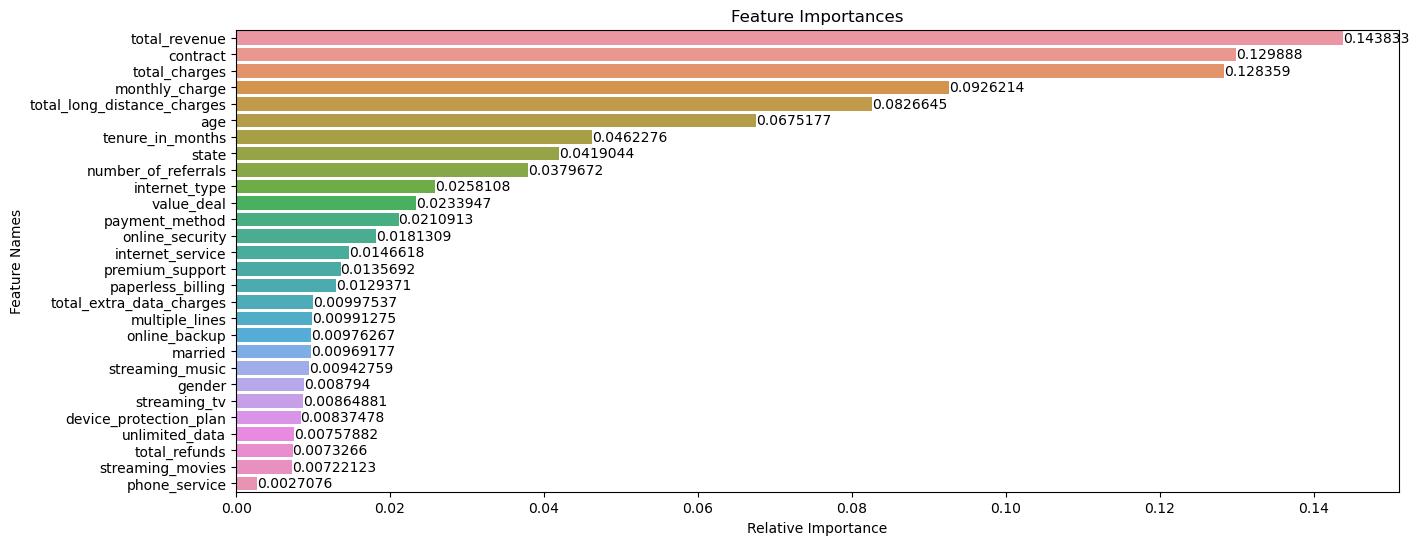

In [14]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
cc=sns.barplot(x=importances[indices], y=X.columns[indices])
for bar in cc.containers:
    cc.bar_label(bar)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [15]:
## now it help to decide to remove the features . remove or drop all the features which have importance less than 0.01

In [16]:
#Use Model for Prediction on New Data i.e taking joined customer  and predicting the customer who are going to churned

In [17]:
new_data=pd.read_csv(r'D:\Churn Analysis using power BI\Data For churn Prediction\JoinedData.csv')

In [18]:
new_data.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,Others,Others


In [19]:
new_data.shape

(411, 32)

In [20]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['customer_id']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"D:\Churn Analysis using power BI\Data For churn Prediction\Predictions.csv", index=False)
